In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import seaborn as sns
sns.set_style()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
#from xgboost import XGBClassfier

In [96]:
df = pd.read_csv('new_data.csv')
df.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,total_grade_1st_sem,total_grade_2nd_sem,admission_grade_per_age,log_course
0,1,17,5,1,1,122.0,1,19,12,5,...,0.000000,0,10.8,1.4,1.74,0,0.000000,0.000000,6.365000,5.141664
1,1,15,1,1,1,160.0,1,1,3,3,...,13.666667,0,13.9,-0.3,0.79,1,5.333333,5.277778,7.500000,9.132811
2,1,1,5,1,1,122.0,1,37,37,9,...,0.000000,0,10.8,1.4,1.74,0,1.000000,1.000000,6.568421,9.112728
3,1,17,2,1,1,122.0,1,38,37,5,...,12.400000,0,9.4,-0.8,-3.12,1,5.571429,5.566667,5.980000,9.187379
4,2,39,1,0,1,100.0,1,37,38,9,...,13.000000,0,13.9,-0.3,0.79,1,5.388889,5.166667,3.144444,8.988945


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Daytime/evening attendance	                     4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [98]:
df.Target.value_counts()

Target
0    2215
1    2209
Name: count, dtype: int64

In [99]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Internationa

In [100]:
#there are no duplicates in the data
df.duplicated().sum()

0

In [101]:
for c in df.columns:
    if df[c].dtype == 'object':
        print(c)

In [102]:
#there are no object variables
#since this is the dataset that has already been cleaned, we will go straight to the task at hand

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [104]:
#splitting into train and test sets
x = df.drop('Target',axis = 1)
y = df.Target

In [105]:
#df.iloc[:2000,:]

In [106]:
0.6 *4424

2654.4

In [107]:
#scaling the x values to have the values on the same scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,total_grade_1st_sem,total_grade_2nd_sem,admission_grade_per_age,log_course
0,-0.294829,-0.095470,2.490896,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,...,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-2.278085,-2.311974,0.337225,-4.180214
1,-0.294829,-0.209869,-0.554068,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.091473,0.156953,1.108152,0.223817
2,-0.294829,-1.010660,2.490896,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,...,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.833793,-1.844177,0.475395,0.201656
3,-0.294829,-0.095470,0.207173,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0.197257,0.292094,0.075721,0.284030
4,1.356212,1.162916,-0.554068,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,-0.074233,...,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,0.116156,0.104975,-1.850276,0.065069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.350082,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667,0.061854,0.156953,0.382447,0.284030
4420,-0.294829,-1.010660,0.207173,0.350082,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126,-0.056624,-0.362821,0.504391,0.284030
4421,-0.294829,-1.010660,-0.554068,0.350082,-0.35023,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199,0.455237,0.143958,-0.601246,0.252767
4422,-0.294829,-1.010660,-0.554068,0.350082,-0.35023,3.593483,-0.126298,1.117723,0.959802,-0.149947,...,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,-0.145483,-0.128923,1.237206,0.210984


In [108]:
#train sets
x_train = x_scaled.iloc[:2650,:]
y_train = y.iloc[:2650]

#validation sets
x_val = x_scaled.iloc[2650:3650,:]
y_val = y.iloc[2650:3650]

#test sets
x_test = x_scaled.iloc[3650:,:]
y_test = y.iloc[3650:]

In [109]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((2650, 39), (2650,), (774, 39), (774,), (1000, 39), (1000,))

#### Model building

In [110]:
#building the baseline model, Logistic Regression model


In [111]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [112]:
log_model.score(x_train,y_train)

0.8539622641509435

In [113]:
log_model.score(x_val,y_val)

0.843

In [114]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_model, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.84150943 0.83018868 0.83396226 0.85849057 0.84528302]
Mean cross-validation score: 0.8418867924528304


In [115]:
##the train and validation model scores are not too far apart, which suggests that the model is not overfitting too much

In [116]:
#making predictions
y_pred = log_model.predict(x_test)
#y_pred

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[318,  79],
       [ 50, 327]], dtype=int64)

In [118]:
#(318+327)/(318+327+50+79)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       397
           1       0.81      0.87      0.84       377

    accuracy                           0.83       774
   macro avg       0.83      0.83      0.83       774
weighted avg       0.84      0.83      0.83       774



In [120]:
log_model_acc = accuracy_score(y_test,y_pred)
log_model_acc

0.8333333333333334

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8341907809900514

In [122]:
pickle.dump(log_model,open('log_model.pkl','wb'))

##### Implementing traditional machine learning models
* Decision trees
* Random forests
* SVM
* Gradient boosting

In [123]:
from xgboost import XGBClassifier
models = {'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'Support Vector Machines':SVC(),
          'XGB':XGBClassifier()}

model_score = {}
def fit_and_score(models,x_train,y_train,x_val,y_val):

    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_val,y_val)
    return model_score
fit_and_score(models,x_train,y_train,x_val,y_val)


{'DecisionTreeClassifier': 0.766,
 'RandomForestClassifier': 0.844,
 'Support Vector Machines': 0.84,
 'XGB': 0.842}

In [124]:
#taking each model separately
#Decision trees

In [125]:
dec_model = DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
dec_model.score(x_val,y_val)

0.777

In [126]:
cv_scores = cross_val_score(dec_model, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.78301887 0.76792453 0.76792453 0.77735849 0.77735849]
Mean cross-validation score: 0.7747169811320755


In [127]:
y_pred = dec_model.predict(x_test)

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       397
           1       0.78      0.78      0.78       377

    accuracy                           0.79       774
   macro avg       0.79      0.79      0.79       774
weighted avg       0.79      0.79      0.79       774



In [129]:
dec_model_acc = accuracy_score(y_test,y_pred)
dec_model_acc

0.7855297157622739

In [130]:
confusion_matrix(y_test,y_pred)

array([[313,  84],
       [ 82, 295]], dtype=int64)

In [131]:
roc_auc_score(y_test,y_pred)

0.7854532334685206

In [132]:
pickle.dump(dec_model,open('dec_model.pkl','wb'))

In [141]:
#Randomforest model

rand_model = RandomForestClassifier()
rand_model.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
rand_model.score(x_train,y_train)

1.0

In [143]:
rand_model.score(x_val,y_val)

0.845

In [144]:
y_pred = rand_model.predict(x_test)

In [145]:
cross_val = cross_val_score(rand_model,x_train,y_train,cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cross_val)
print("Mean cross-validation score:", cross_val.mean())


Cross-validation scores: [0.82830189 0.83207547 0.85660377 0.84339623 0.83962264]
Mean cross-validation score: 0.8400000000000001


In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       397
           1       0.80      0.88      0.84       377

    accuracy                           0.83       774
   macro avg       0.84      0.84      0.83       774
weighted avg       0.84      0.83      0.83       774



In [147]:
rand_model_acc = accuracy_score(y_test,y_pred)

In [148]:
roc_auc_score(y_test,y_pred)

0.8356506691432428

In [149]:
pickle.dump(rand_model,open('rand_model.pkl','wb'))

In [150]:
#support vector classifier

In [151]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [152]:
svc.score(x_val,y_val)

0.84

In [153]:
cv_scores = cross_val_score(svc,x_train,y_train,cv = 5)

print('Scores are ',cv_scores)
print("Mean score is ", cv_scores.mean())

Scores are  [0.82264151 0.80566038 0.8245283  0.84528302 0.84339623]
Mean score is  0.8283018867924528


In [154]:
y_pred = svc.predict(x_test)

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       397
           1       0.77      0.87      0.82       377

    accuracy                           0.81       774
   macro avg       0.82      0.82      0.81       774
weighted avg       0.82      0.81      0.81       774



In [156]:
svc_acc = accuracy_score(y_test,y_pred)

In [157]:
svc_acc

0.813953488372093

In [158]:
roc_auc_score(y_test,y_pred)

0.8154327215388624

In [159]:
confusion_matrix(y_test,y_pred)

array([[301,  96],
       [ 48, 329]], dtype=int64)

In [160]:
pickle.dump(svc,open('svc_model.pkl','wb'))

In [161]:
#Xgboost classifier

In [162]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_val,y_val)

0.842

In [163]:
cv_scores = cross_val_score(xgb,x_train,y_train,cv = 5)

print('Scores are ',cv_scores)
print("Mean score is ", cv_scores.mean())

Scores are  [0.83962264 0.83396226 0.8490566  0.84339623 0.85283019]
Mean score is  0.8437735849056605


In [164]:
y_pred = xgb.predict(x_test)

In [165]:
xgb_acc = accuracy_score(y_test,y_pred)

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       397
           1       0.80      0.87      0.83       377

    accuracy                           0.83       774
   macro avg       0.83      0.83      0.83       774
weighted avg       0.83      0.83      0.83       774



In [168]:
confusion_matrix(y_test,y_pred)

array([[315,  82],
       [ 50, 327]], dtype=int64)

In [169]:
roc_auc_score(y_test,y_pred)

0.8304124434585652

In [170]:
pickle.dump(xgb,open('xgb_model.pkl','wb'))

In [182]:
acc_table = pd.DataFrame([dec_model_acc,log_model_acc,rand_model_acc,xgb_acc,svc_acc],columns=['accuracy'],
                         index=['DecisionTrees',
                                'LogisticRegression',
                                'RandomForestClassifier',
                                'XGBClassifier',
                                'SVC'])

In [183]:
acc_table

,accuracy
DecisionTrees,0.785530
LogisticRegression,0.833333
RandomForestClassifier,0.834625
XGBClassifier,0.829457
SVC,0.813953


<Axes: >

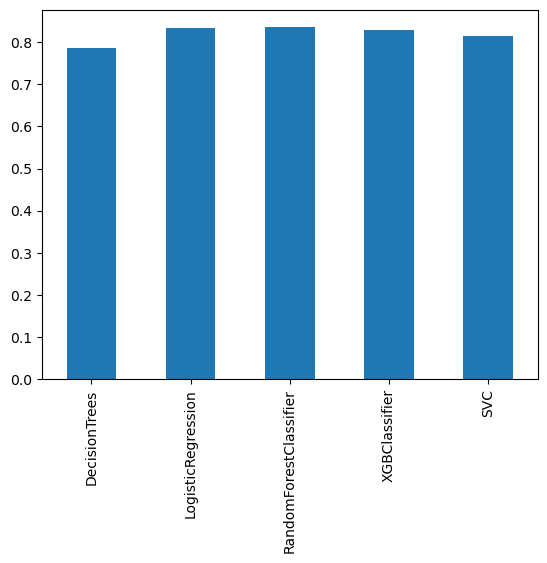

In [184]:
acc_table.accuracy.plot.bar()

In [185]:
#of the tradtional models, Randomforest has the highest accuracy

In [186]:
import tensorflow as tf
from tensorflow import keras

In [230]:
model = keras.Sequential([
    keras.layers.Dense(24,input_shape=(39,),activation = 'relu'),
    keras.layers.Dense(12,activation = 'relu'),
    keras.layers.Dense(4,activation = 'relu'),
    #keras.layers.Dense(2,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

In [231]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 24)                960       
                                                                 
 dense_11 (Dense)            (None, 12)                300       
                                                                 
 dense_12 (Dense)            (None, 4)                 52        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1317 (5.14 KB)
Trainable params: 1317 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [232]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs = 100)

Epoch 1/100
83/83 [==============================] - 3s 10ms/step - loss: 0.6662 - accuracy: 0.6242 - val_loss: 0.6124 - val_accuracy: 0.7470
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.7713 - val_loss: 0.4675 - val_accuracy: 0.8060
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.8181 - val_loss: 0.3967 - val_accuracy: 0.8250
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3758 - accuracy: 0.8374 - val_loss: 0.3725 - val_accuracy: 0.8310
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3570 - accuracy: 0.8423 - val_loss: 0.3662 - val_accuracy: 0.8330
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.8479 - val_loss: 0.3624 - val_accuracy: 0.8340
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.8555 - val_loss: 0.3557 - val_accuracy: 0.8380
Epoch 8/100


In [233]:
y_pred = model.predict(x_test)

25/25 [==============================] - 0s 2ms/step


In [234]:
y_pred

array([[9.99993324e-01],
       [7.29632971e-04],
       [9.95938241e-01],
       [4.93893474e-01],
       [9.07540679e-01],
       [9.85728025e-01],
       [2.84601271e-01],
       [8.37180734e-01],
       [9.96715248e-01],
       [7.21347606e-05],
       [7.08167785e-17],
       [9.99675989e-01],
       [9.56886530e-01],
       [9.52724099e-01],
       [9.65086162e-01],
       [4.85667199e-01],
       [3.76237440e-04],
       [1.05137859e-15],
       [9.94252503e-01],
       [5.10922790e-01],
       [9.99319375e-01],
       [9.99982834e-01],
       [9.93960202e-01],
       [7.29245126e-01],
       [9.18255091e-01],
       [9.96294141e-01],
       [2.68985084e-13],
       [9.90005712e-13],
       [9.96298671e-01],
       [9.61653888e-01],
       [4.06795036e-04],
       [2.78471161e-05],
       [8.17135061e-25],
       [5.30870690e-04],
       [5.35141362e-06],
       [7.57496238e-01],
       [9.59386051e-01],
       [3.38008928e-17],
       [1.94781450e-07],
       [8.79378498e-01],


In [235]:
#confusion_matrix(y_test,y_pred)

In [250]:
y_p = []
for element in y_pred:
    if element > 0.45:
        y_p.append(1)
    
    else:
        y_p.append(0)

In [251]:
y_p

[1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [252]:
confusion_matrix(y_test,y_p)

array([[305,  92],
       [ 64, 313]], dtype=int64)

In [253]:
1-((92+64)/(64+92+313+305))

0.7984496124031008

In [254]:
pickle.dump(model,open('dl.pkl','wb'))

In [255]:
roc_auc_score(y_test,y_p)

0.7992503457629837